## Regression
HW3
John Lochner & Jason Li \
Computational Physics

## Introduction
In this report, we perform polynomial regression of hermite polynomials in 1 and 2 dimensions. Error is minimized via least sqaure minimization.Regression is a technique used to approximate the relationship between a independent and 1 or more dependent variables. \
\
Polynomial regression specifically uses a polynomial function approximation of degree m. The higher the polynomial, the more computationally intensive the regression is. \
\
To further fit the polynomial, one can use backsolving of the real output and polynomial output to find a matching coefficient matrix, a.

## Problem 1
## Key Equations

Coefficients: $\{a_j\}_{j=1}^m\\$ 

Hermite Polynomials: 
$$
H_0(x) = 1
$$
$$
H_1(x) = 2x
$$
$$
H_2(x) = 4x^2-2
$$
$$
H_3(x) = 8x^3-12x
$$
$$
H_4(x) = 16x^4-48x^2+12
$$
$$
H_5(x) = 32x^5-160x^3+120x
$$
$$
H_6(x) = 64x^6-480x^4+720x^2-120\\
$$

Error function:
$$
    error^2 = \sum_{k=1}^n \left(\sum_{j=1}^m a_j H_{j - 1}(x_k) - f_k\right)^2 \to \min.
$$

## Solution: 
$$
error^2 = \left\|
    \underbrace{\left\{\begin{pmatrix}
    1 & H_1(x_1) & H_2(x_1) & \ldots & H_{m-1}(x_1) \\
    1 & H_1(x_2) & H_2(x_2) & \ldots & H_{m-1}(x_2) \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    1 & H_1(x_n) & H_2(x_n) & \ldots & H_{m-1}(x_n) \\
\end{pmatrix}\right.}
\begin{pmatrix}
    a_1 \\
    a_2 \\
    \vdots \\
    a_m 
\end{pmatrix}
-
\begin{pmatrix}
    f_1 \\
    f_2 \\
    \vdots \\
    f_n 
\end{pmatrix}
\right\|_2^2 \to \min,
$$

## Problem 2
## Key Equations:
The key equations in this problem would be the same as the key equations in problem 1.

## Solution: 
In this problem we started by coding the matrix that we solved in problem 1. In order to do this, we first split up the matrix by rows and columns. We inputted the Hermite Polynomials as lambda funcitons, and applied it to the respective x's in the x_given vector as shown below. From there, we created a hermite_sum function where it would return the result of  $\sum_{k=1}^n \left(\sum_{j=1}^m a_j H_{j - 1}(x_k) - f_k\right)^2$

In [2]:
function hermite_regression(x_given, f_given, m::Integer)
    hvector = [x -> 1, x -> 2x, x -> 4x^2 - 2] # This is a vector of the hermites up to degree 3
    l = length(x_given)
    A = zeros(l, m + 1) # initializes matrix 
    for x=1:l
        for y=1:m + 1
            A[x, y] = hvector[y](x_given[x]) # fills out matrix with Hermite polynomial
        end
    end
    a = A \ f_given # gets coeifficients of hermite
    ## this function calls the hvector at the position of the desired degree, m
    function hermite_sum(x) 
        s = 0
        for i= 1:m+1
            s += a[i] * hvector[i](x)
        end
        return s
    end
    
    return hermite_sum
end


hermite_regression (generic function with 1 method)

After this, we used the random package to artifically induce noise into data generated by the exact function $ f(x)=x^2 $. This data was plotted below

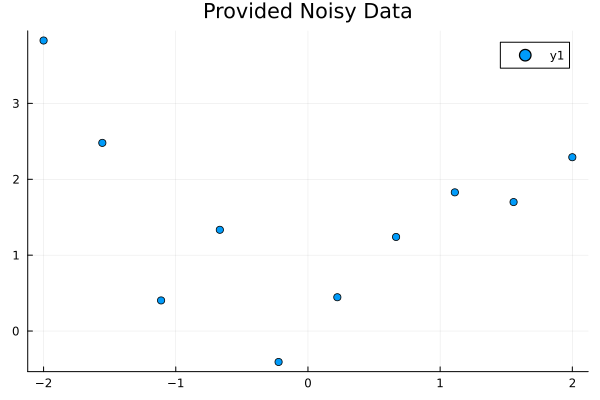

In [3]:
using Random, Plots
Random.seed!(926491)
f_exact(x) = x^2
x_given = range(-2, 2, 10)
f_given = f_exact.(x_given) + randn(length(x_given));
plt1=scatter(x_given, f_given,title="Provided Noisy Data")

From here, we ran the data provided into the hermite polynomial funciton, and plotted m=1, m=2, and m=1, along with the exact function to visualize the differences between the different order of polynomials for the Hermite Polynomials and Exact Function

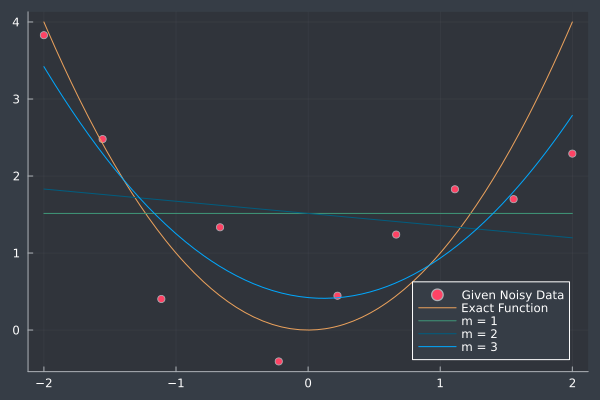

In [4]:
using Plots
Plots.theme(:dark)
scatter(x_given, f_given, label = "Given Noisy Data")
plot!(x -> f_exact(x), label = "Exact Function")
for m in 0:2
    regression = hermite_regression(x_given, f_given, m)
    plot!(regression, label = "m = $(m+1)")
end
plot!()


Addtionally, now we also plot the Lagange Interpolation Polynomial to see the difference bwtween the Hermite Polynomial and Lagrange Interpolation Polynomial:

[0.4214282967873682, -0.1583274431119579, 0.6705629480370494]


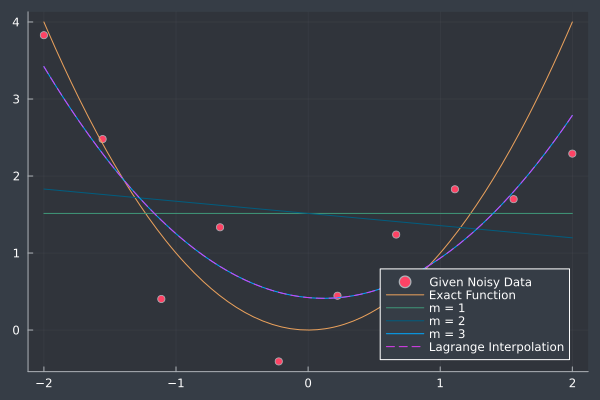

In [33]:
function poly_regression(x_given, f_given, m::Int, x_eval)
    
    # consistency check
    @assert length(x_given) == length(f_given)
    
    n = length(x_given)
    
    # Step 1: get matrix X
    X = ones(n, m)
    
    for j = 2:m
        X[:, j] = x_given .* X[:, j - 1]
        # this equivalent to
        # X[:, j] = x_given .^ (j - 1)
    end
        
    # Step 2: get a's
    a = X \ f_given
    
    println(a)
    
    # Step 3: Perform regression
    P = zeros(length(x_eval))
    
    x_evalʲ⁻¹ = ones(length(x_eval))
    
    for j = 1:m
        P += a[j] *  x_evalʲ⁻¹
        x_evalʲ⁻¹ .*= x_eval
    end
    
    return P
end
     

x_set = range(-2, 2, 100)

using Plots
k_k = poly_regression(x_given, f_given, 3, x_set)

Plots.theme(:dark)
scatter(x_given, f_given, label = "Given Noisy Data")
plot!(x -> f_exact(x), label = "Exact Function")
for m in 0:2
    regression = hermite_regression(x_given, f_given, m)
    plot!(regression, label = "m = $(m+1)")
end
plot!(x_set,k_k,label = "Lagrange Interpolation",linestyle = :dash)
plot!()


As seen above, the Langrange Interpolation and the 3rd Hermite Polynomial is overlapping.

## Problem 3
## Key Equations:
In this problem, we had to assume that the input data is $\{(x_k, y_k)\}_{k=1}^n$ and $\{f_k\}_{k=1}^n$, and that we had to find the quadratic polynomial in the variables $x$ and $y$ in the equation:
$$
    f(x, y) = a_1 + x a_2 + y a_3 +  x ^2  a_4 + x y a_5 + y ^ 2 a_6,
$$
so that $f(x_k, y_k) \approx f_k$ in the least-squared error sense, This would be done by formulating the problem in matrix form.


## Solution: 
$$
f(x_k,y_k) = \begin{pmatrix}
    1 & x_1 & y_1 & x_1^2 & x_1y_1 & y_1^2 \\
    1 & x_2 & y_2 & x_2^2 & x_2y_2 & y_2^2\\
    \vdots &\vdots &\vdots &\vdots &\vdots &\vdots \\
    1 & x_n & y_n & x_n^2 & x_ny_n & y_n^2
\end{pmatrix}
\begin{pmatrix}
    a_1 \\
    a_2 \\
    \vdots \\
    a_6 
\end{pmatrix}
$$

$f(x_k, y_k) \approx f_k$, where error is
$$
error^2 = \left\|
    \underbrace{\left\{\begin{pmatrix}
    1 & x_1 & y_1 & x_1^2 & x_1y_1 & y_1^2 \\
    1 & x_2 & y_2 & x_2^2 & x_2y_2 & y_2^2\\
    \vdots &\vdots &\vdots &\vdots &\vdots &\vdots \\
    1 & x_n & y_n & x_n^2 & x_ny_n & y_n^2
\end{pmatrix}\right.}
\begin{pmatrix}
    a_1 \\
    a_2 \\
    \vdots \\
    a_6 
\end{pmatrix}
-
\begin{pmatrix}
    f_1 \\
    f_2 \\
    \vdots \\
    f_n 
\end{pmatrix}
\right\|_2^2 \to \min,
$$

### Conclusion
As shown, error decreases with increasing polynomial degree m. Additionally the Lagrangian Interpolation polynomial method produced identical results to the Hermite polynomial method at m = 3. This shows there are multiple techniques for achieving the desired level of regression.